In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
cwd = os.getcwd()
print(f"Current Working Directory: {cwd}")

Current Working Directory: /content


In [3]:
%cd /content/drive/MyDrive/last_dl/som


/content/drive/MyDrive/last_dl/som


# Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Loading Data

In [5]:
data = pd.read_csv('Credit_Card_Applications.csv')

In [6]:
data.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [7]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values

# Feature Scaling

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
sc = MinMaxScaler(feature_range=(0,1))
X_scaled = sc.fit_transform(X)

# Training

In [10]:
!pip install minisom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
from minisom import MiniSom
som = MiniSom(x = 20,y = 20,input_len = 15,sigma = 1.0,learning_rate=0.5)
som.random_weights_init(X_scaled)
som.train_random(data = X_scaled,num_iteration = 100)

# Visualization

In [15]:
from pylab import bone, pcolor, colorbar, plot, show,figure

<Figure size 432x288 with 0 Axes>

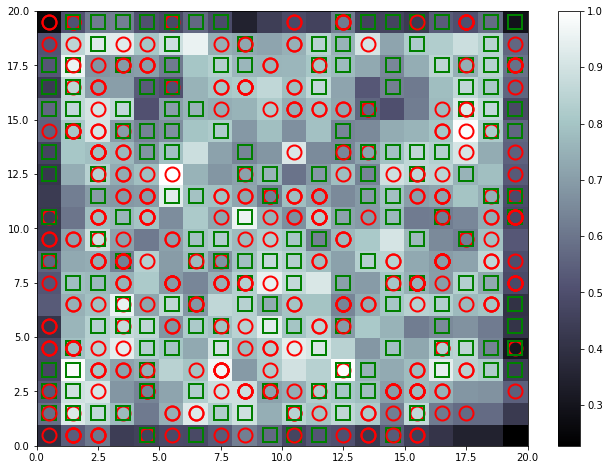

In [16]:
bone()
figure(figsize=(11,8))
pcolor(som.distance_map().T)
colorbar()
markers = ['o','s']
colors = ['r','g']

for i, x in enumerate(X_scaled):
  w = som.winner(x)
  #print(w)
  plot(
       w[0]+0.5,
       w[1]+0.5,
       markers[Y[i]],
       markeredgecolor = colors[Y[i]],
       markerfacecolor = 'None',
       markersize = 14,
       markeredgewidth = 2
  )

show()

# Fraud detection

In [18]:
mappings = som.win_map(X_scaled)
frauds = np.concatenate((mappings[(3,6)],mappings[(1,17)],mappings[(7,17)],mappings[(17,15)],mappings[(12,3)]),axis=0)
frauds_ = sc.inverse_transform(frauds)

In [19]:
for i in frauds_[:, 0]:
  print(int(i))

15642391
15635244
15581700
15629133
15604963
15678210
15607986
15673907
15603683
15659100
15710138
15762799
15716347


In [20]:
frauds_.shape

(13, 15)

# Unsupervised Learning To Supervised Learning

## Managing datus

In [21]:
customers = data.iloc[:,1:].values

In [22]:
customers

array([[1.000e+00, 2.208e+01, 1.146e+01, ..., 1.000e+02, 1.213e+03,
        0.000e+00],
       [0.000e+00, 2.267e+01, 7.000e+00, ..., 1.600e+02, 1.000e+00,
        0.000e+00],
       [0.000e+00, 2.958e+01, 1.750e+00, ..., 2.800e+02, 1.000e+00,
        0.000e+00],
       ...,
       [0.000e+00, 1.883e+01, 9.540e+00, ..., 1.000e+02, 1.000e+00,
        1.000e+00],
       [0.000e+00, 2.742e+01, 1.450e+01, ..., 1.200e+02, 1.200e+01,
        1.000e+00],
       [1.000e+00, 4.100e+01, 4.000e-02, ..., 5.600e+02, 1.000e+00,
        1.000e+00]])

##Classification

In [23]:
is_fraud = np.zeros(len(data))
for i in range(len(data)): 
  if data.iloc[i,0] in frauds_:
    is_fraud[i] = 1



## Feature Scaling

In [24]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
customers = ss.fit_transform(customers)

### Building ANN

Importing Libraries

In [25]:
import tensorflow as tf

In [26]:
model = tf.keras.models.Sequential()

In [27]:
model.add(tf.keras.layers.Dense(units = 2,activation = 'relu',kernel_initializer='uniform'))

In [28]:
# model.add(tf.keras.layers.Dense(units = 4,activation = 'relu',kernel_initializer='uniform'))

In [29]:
# model.add(tf.keras.layers.Dense(units = 5,activation = 'relu',kernel_initializer='uniform'))

In [30]:
model.add(tf.keras.layers.Dense(units = 1,activation = 'sigmoid',kernel_initializer='uniform'))

In [31]:
model.compile(optimizer='adam',loss= 'binary_crossentropy',metrics = ['accuracy'])

In [32]:
model.fit(x=customers,y = is_fraud,batch_size = 1,epochs = 10)

Epoch 1/10
690/690 [==============================] - 2s 2ms/step - loss: 0.5002 - accuracy: 0.9754
Epoch 2/10
690/690 [==============================] - 1s 2ms/step - loss: 0.1549 - accuracy: 0.9812
Epoch 3/10
690/690 [==============================] - 1s 2ms/step - loss: 0.0946 - accuracy: 0.9812
Epoch 4/10
690/690 [==============================] - 1s 2ms/step - loss: 0.0847 - accuracy: 0.9812
Epoch 5/10
690/690 [==============================] - 1s 2ms/step - loss: 0.0810 - accuracy: 0.9812
Epoch 6/10
690/690 [==============================] - 1s 2ms/step - loss: 0.0786 - accuracy: 0.9812
Epoch 7/10
690/690 [==============================] - 1s 2ms/step - loss: 0.0769 - accuracy: 0.9812
Epoch 8/10
690/690 [==============================] - 1s 2ms/step - loss: 0.0755 - accuracy: 0.9812
Epoch 9/10
690/690 [==============================] - 2s 2ms/step - loss: 0.0739 - accuracy: 0.9812
Epoch 10/10
690/690 [==============================] - 2s 3ms/step - loss: 0.0728 - accuracy: 0.9812

##Predicting

In [33]:
y_pred = model.predict(customers)

22/22 [==============================] - 0s 2ms/step


In [34]:
y_pred = np.concatenate((data.iloc[:,0:1].values,y_pred),axis = 1)

In [35]:
y_pred = y_pred[y_pred[:,1].argsort()]

In [36]:
print(y_pred)

[[1.57901130e+07 3.12710313e-07]
 [1.56921370e+07 1.30586879e-04]
 [1.56214230e+07 1.44533857e-04]
 ...
 [1.56458200e+07 1.67191535e-01]
 [1.55933450e+07 1.80143446e-01]
 [1.57163470e+07 2.64459550e-01]]
